- len : 1   
    - 706152 기준, 크면 0.4, 작으면 0.6
 


In [527]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random
import os
from tqdm.auto import tqdm
import warnings
import albumentations as A
warnings.filterwarnings('ignore')

In [528]:
os.getcwd()

'/home/gyuseonglee/workspace/2301_OCR'

In [530]:
df = pd.read_csv('./data/train.csv')
df['len'] = df['label'].str.len()
# df = df[df['len']<3].reset_index()
df['img_path'] = df['img_path'].str.replace("./train", "/home/gyuseonglee/workspace/2301_OCR/data/train")

ones = df[df['len']==2].reset_index()
del ones['index']
bgs = []
for idx in tqdm(range(len(ones))):
    img = cv2.imread(ones['img_path'][idx], 0)
    img = A.Resize(height=64, width=128)(image=img)['image']
    bg = len(img[img<150])
    bgs.append(bg)
ones['bgs'] = bgs
ones.head(3)



  0%|          | 0/28631 [00:00<?, ?it/s]

,id,img_path,label,len,bgs
0,TRAIN_00002,/home/gyuseonglee/workspace/2301_OCR/data/trai...,차차,2,430
1,TRAIN_00006,/home/gyuseonglee/workspace/2301_OCR/data/trai...,유월,2,753
2,TRAIN_00008,/home/gyuseonglee/workspace/2301_OCR/data/trai...,손뼉,2,401


28631


<AxesSubplot: >

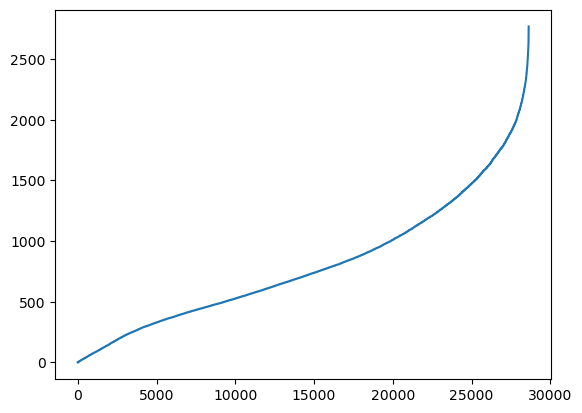

In [531]:
target = 'bgs'
print(len(ones))
ones = ones.sort_values([target]).reset_index();
del ones['index']
ones[target].plot()

6000
372
고속


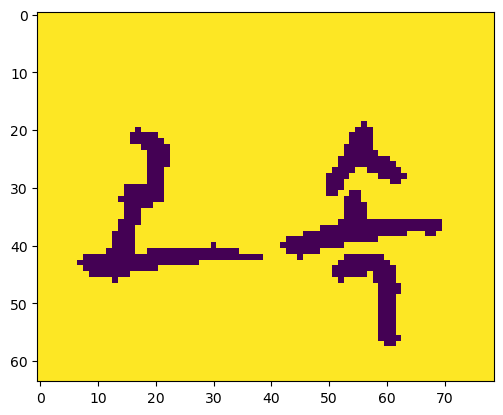

In [550]:
# idx = len(ones)//2

idx = 6000

print(idx)
img_blur = cv2.imread(ones['img_path'][idx], 0)
print(ones[target][idx])
print(ones['label'][idx])
# if img_blur.sum() < 540000:
#     img_blur = img_blur -20

# img_blur[img_blur>150] = 255
# thresholding
_, img_blur = cv2.threshold(img_blur, img_blur.mean()*0.85, 255, cv2.THRESH_BINARY)
plt.imshow(img_blur)

In [390]:
len(img_blur[img_blur>245])

2272

In [322]:
img_blur

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

735183


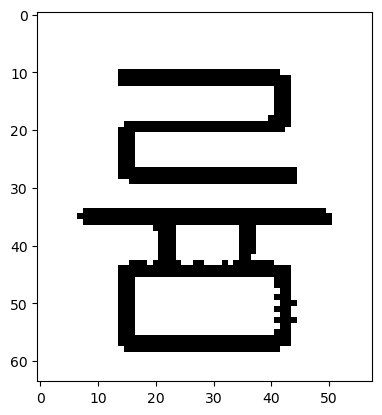

In [122]:
img_clear = cv2.imread(ones['img_path'][13500])
print(ones['background'][15000])
_, img_clear = cv2.threshold(img_clear, img_clear.mean()*0.4, 255, cv2.THRESH_BINARY)
plt.imshow(img_clear)

In [44]:
ones['background'][10000]

665955

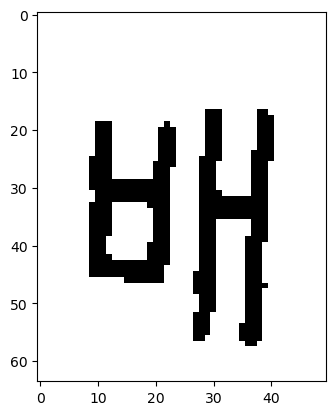

In [46]:
plt.imshow(cv2.threshold(img, img.mean()*0.75, 255, cv2.THRESH_BINARY)[1])